**1. Importing necessary libraries and combining no. of CSV**

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

#combining no of csv file into one file with name combine_csv
os.chdir('D:\Final')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv

df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)
#dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'])
# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])

In [2]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)
df1

,AP1RTTA,AP1STDEVA,AP2RTTA,AP2STDEVA,AP3RTTA,AP3STDEVA,x,y,Product_RTTA,Product_RTT12A,Product_RTT23,Product_RTT13A
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1,112.702990,10.211379,14.469507,85.967193
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1,80.723608,7.723269,10.441548,80.804412
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1,83.649729,8.929305,10.820040,72.424008
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1,88.938013,9.160368,11.592546,74.487448
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1,77.335115,7.933434,10.118424,74.503964
...,...,...,...,...,...,...,...,...,...,...,...,...
390,7.516,0.348,10.881,0.452,0.491,0.989,6,8,40.154764,81.781596,5.342571,3.690356
391,7.320,0.427,10.959,0.427,0.452,1.007,6,8,36.259386,80.219880,4.953468,3.308640
392,7.320,0.403,10.920,0.438,0.530,0.941,6,8,42.365232,79.934400,5.787600,3.879600
393,7.320,0.302,11.194,0.284,0.451,0.991,6,8,36.954976,81.940080,5.048494,3.301320


In [3]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [4]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [5]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions

grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [6]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions

groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [7]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [8]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [9]:
#taking input data and output data by concatinating two dataframes
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]
input_data


,AP1RTTA_min,AP1RTTA_max,AP1RTTA_25,AP1RTTA_50,AP1RTTA_75,AP1STDEVA_min,AP1STDEVA_max,AP1STDEVA_25,AP1STDEVA_50,AP1STDEVA_75,...,A_P_1_R_T_T_B,A_P_1_S_T_D_E_V_B,A_P_2_R_T_T_B,A_P_2_S_T_D_E_V_B,A_P_3_R_T_T_B,A_P_3_S_T_D_E_V_B,P_r_o_d_u_c_t___R_T_T_B,P_r_o_d_u_c_t___R_T_T_1_2_B,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_B
0,7.291,9.781,7.5550,7.613,7.7010,0.083,2.875,0.93850,1.9780,2.22000,...,7.701247,1.284562,1.045425,0.141963,10.495666,1.765401,84.501124,8.051205,10.972355,80.828673
1,5.499,13.648,7.2030,7.291,7.3790,0.000,4.465,1.26700,1.5080,2.16500,...,7.319855,1.598138,2.084158,1.720347,9.855404,0.802764,150.350479,15.256179,20.540028,72.138262
2,4.918,8.467,5.4060,5.484,5.6020,0.129,2.676,0.95650,1.0620,1.21650,...,5.561764,1.070146,2.954241,0.302136,8.922131,0.415342,146.645583,16.434603,26.360476,49.623094
3,3.492,6.827,5.0640,5.182,5.3280,0.058,2.696,0.18400,0.2660,0.40900,...,5.259823,0.611491,2.998302,0.281244,11.299793,0.164010,178.183766,15.769445,33.879835,59.432941
4,2.491,4.303,3.6085,3.775,3.9810,0.080,1.977,0.16550,0.2150,0.29150,...,3.841902,0.868242,4.311887,0.598031,7.111352,1.792018,117.829467,16.570329,30.662568,27.319950
5,2.789,6.148,4.6250,4.929,5.6210,0.052,2.680,0.18600,0.2670,0.66500,...,4.858888,0.526955,7.449432,0.138517,6.057580,0.280483,219.305192,36.191185,45.124512,29.443773
6,2.178,3.624,2.5940,2.672,2.7110,0.057,2.625,2.15625,2.2795,2.38800,...,2.671067,2.285251,6.636018,1.623611,7.180249,0.925377,127.267301,17.724517,47.648455,19.178980
7,0.900,1.695,1.0700,1.178,1.2560,0.053,1.978,0.13800,0.1750,0.23300,...,1.179289,0.293636,10.096093,0.168584,5.669654,1.064750,67.503082,11.906871,57.241202,6.685706
8,7.516,8.229,7.8670,7.945,8.0230,0.000,0.685,0.09300,0.1255,0.18350,...,7.991153,0.173280,2.513745,0.851494,10.413860,0.758885,209.189829,20.087880,26.178898,83.214182
9,6.266,8.414,6.4610,6.578,6.6560,0.841,2.412,1.76975,1.8515,1.96300,...,6.593670,1.863201,3.477179,0.184102,9.097593,1.571577,208.578083,22.929268,31.633872,59.980020


In [10]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [11]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 120)


In [12]:
#Used standardscaler 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**2. Test with Random Forest Regressor**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 100}
Mean Squared Error in meter: 0.863
Root Mean Squared Error (RMSE) on new data in meter: 0.929
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 28.226
R2 score is in percent: 79.70


**3. Testing with KNN Regressor**

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.29
Root Mean Squared Error (RMSE) on new data in m: 1.13
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 37.806
R2 score is in percent: 67.16


**4. Testing with DNN Regressor Model and Hyperparameter Tuning by using Keras Tuner**

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(120,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [16]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='testtt_new_copy',
    project_name='hellooo_new_copy')

INFO:tensorflow:Reloading Tuner from testtt_new_copy\hellooo_new_copy\tuner0.json


In [17]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [18]:
tuner.results_summary()

Results summary
Results in testtt_new_copy\hellooo_new_copy
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 400
dropout_1: 0.0
num_hidden_layers: 1
units_2: 112
activation_2: sigmoid
dropout_2: 0.30000000000000004
learning_rate: 0.001
units_3: 192
activation_3: sigmoid
dropout_3: 0.1
units_4: 336
activation_4: relu
dropout_4: 0.4
units_5: 432
activation_5: relu
dropout_5: 0.0
units_6: 512
activation_6: tanh
dropout_6: 0.1
units_7: 432
activation_7: relu
dropout_7: 0.30000000000000004
units_8: 96
activation_8: tanh
dropout_8: 0.2
units_9: 432
activation_9: sigmoid
dropout_9: 0.4
units_10: 256
activation_10: sigmoid
dropout_10: 0.4
units_11: 272
activation_11: sigmoid
dropout_11: 0.30000000000000004
Score: 0.604464719692866
Trial summary
Hyperparameters:
units_1: 288
dropout_1: 0.4
num_hidden_layers: 3
units_2: 144
activation_2: relu
dropout_2: 0.0
learning_rate: 0.0001
units_3: 256
activation_3: sigmoid
dropout_3: 0.1
units_4: 176
activation_4: relu
dropout_4: 0.0
units_5

In [19]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 1s 723ms/step - loss: 18.9977 - mse: 18.9977 - val_loss: 19.8354 - val_mse: 19.8354
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 15.8773 - mse: 15.8773 - val_loss: 16.9478 - val_mse: 16.9478
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 13.7277 - mse: 13.7277 - val_loss: 14.3507 - val_mse: 14.3507
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 11.4768 - mse: 11.4768 - val_loss: 12.0314 - val_mse: 12.0314
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 9.2572 - mse: 9.2572 - val_loss: 9.9933 - val_mse: 9.9933
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 8.3113 - mse: 8.3113 - val_loss: 8.2194 - val_mse: 8.2194
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 5.7843 - mse: 5.7843 - val_loss: 6.7089 - val_mse: 6.7089
Epoch 8/500
1/1 [==============================] - 0s 21ms/step - loss: 4

In [20]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.5046 - mse: 0.5046


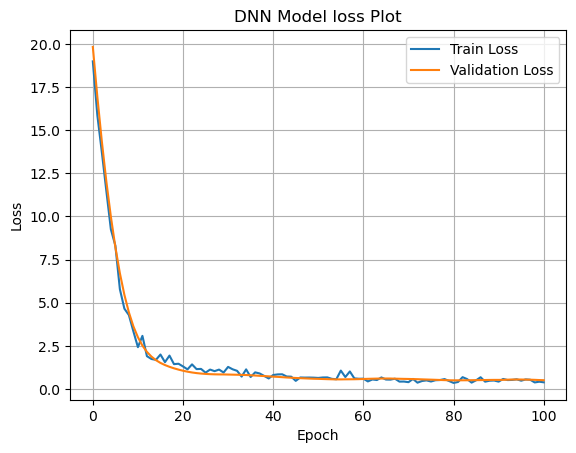

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [22]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 83ms/step


array([[5.087154  , 6.97905   ],
       [5.4793777 , 3.26837   ],
       [1.3031187 , 3.6499555 ],
       [2.7883952 , 6.1829753 ],
       [4.683746  , 0.67453885],
       [4.257589  , 6.365557  ],
       [1.7824749 , 6.5207953 ],
       [4.4335003 , 6.842014  ],
       [4.240049  , 2.6601367 ],
       [2.9219003 , 6.904313  ],
       [2.4153347 , 1.5384728 ],
       [2.7035422 , 1.2881352 ]], dtype=float32)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.50
Root Mean Squared Error (RMSE) on new data in m: 0.71
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.71
R2 score is in percent: 87.60


**5. Random Regressor for DNN output**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 200}
Mean Squared Error in meter: 0.226
Root Mean Squared Error (RMSE) on new data in meter: 0.475
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 14.433
R2 score is in percent: 93.56


**6. KNN Regressor for DNN Output**

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.81
Root Mean Squared Error (RMSE) on new data in m: 0.90
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 26.88
R2 score is in percent: 78.95


In [26]:
#for saving DNN Model
from tensorflow.keras.models import load_model

dnn_model.save('m3y_DNN_Regrr_model_xy_test_copy.h5')


In [27]:
loaded_model = load_model('m3y_DNN_Regrr_model_xy_test_copy.h5')
loaded_model

**7. Validate the model with Unknown/online dataset**

In [28]:

dfff=pd.read_csv('D:/testt.csv')

In [29]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)
#dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'],square_RTT1=dfff['AP1RTT']*dfff['AP1RTT'],square_RTT2=dfff['AP2RTT']*dfff['AP2RTT'],square_RTT3=dfff['AP3RTT']*dfff['AP3RTT'])
dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'])

In [30]:
# Group the DataFrame by 'x' and 'y'
groups = dffff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])

In [31]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [32]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [33]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()


In [34]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [35]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [36]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [37]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [38]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [39]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 120)


In [40]:
sc = StandardScaler()
XX= sc.fit_transform(XX)


In [41]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 2ms/step


array([[1.3637596 , 1.3591738 ],
       [1.5854747 , 2.2112765 ],
       [1.3427453 , 3.0841668 ],
       [0.86467385, 3.2519305 ],
       [1.224469  , 4.0340943 ],
       [1.4003772 , 6.0395722 ],
       [2.29464   , 6.681105  ],
       [1.4156963 , 7.0128007 ],
       [2.570125  , 1.4968024 ],
       [2.0773516 , 1.656634  ],
       [1.5354359 , 3.3019524 ],
       [1.0881388 , 3.5899806 ],
       [2.091867  , 4.637921  ],
       [2.8422472 , 6.428543  ],
       [2.1143453 , 6.1829085 ],
       [2.6899564 , 7.044849  ],
       [2.398405  , 0.9106165 ],
       [2.303809  , 1.5122579 ],
       [2.5115733 , 2.3274999 ],
       [3.0229857 , 3.7395072 ],
       [2.6598287 , 7.314532  ],
       [4.071383  , 1.2310385 ],
       [2.64289   , 1.4969817 ],
       [3.773801  , 2.4770281 ],
       [4.2192645 , 4.0216484 ],
       [2.6831317 , 5.0897527 ],
       [4.3451424 , 6.657986  ],
       [4.593656  , 6.932121  ],
       [4.5049577 , 7.370806  ],
       [5.052073  , 1.2687024 ],
       [4.

In [42]:
mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.36
Root Mean Squared Error (RMSE) on new data in mm: 0.60
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 18.39
R2 score is in percent: 90.68


In [43]:
#creating dataframe for predicting values comparing with True values
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,1.363760,1.359174,1,1
1,1.585475,2.211277,1,2
2,1.342745,3.084167,1,3
3,0.864674,3.251930,1,4
4,1.224469,4.034094,1,5
5,1.400377,6.039572,1,6
6,2.294640,6.681105,1,7
7,1.415696,7.012801,1,8
8,2.570125,1.496802,2,1
9,2.077352,1.656634,2,2


In [45]:
#df_finall_dnn.to_csv('output_data_dnn.csv', index=False) #for saving output value in csv file for reference

**8. Random Forest Regressor for final Prediction**

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_predd,yy)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 50}
Mean Squared Error in meter: 0.080
Root Mean Squared Error (RMSE) on new data in meter: 0.283
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 11.03
R2 score is in percent: 97.79


In [47]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.32,1.48,1,1
1,1.44,2.18,1,2
2,1.20,3.18,1,3
3,1.14,3.78,1,4
4,1.24,4.54,1,5
5,1.30,6.32,1,6
6,1.36,6.88,1,7
7,1.40,7.94,1,8
8,2.54,1.36,2,1
9,2.04,1.86,2,2


In [48]:
#df_finall.to_csv('output_data_with_ex.csv', index=False)

**9. KNN Regressor for Final Prediction**

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_predd, yy)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.21
Root Mean Squared Error (RMSE) on new data in m: 0.46
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.95
R2 score is in percent: 94.52


In [50]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_knn = pd.DataFrame()
df_finall_knn = pd.concat([y_predd, yy], axis=1)
df_finall_knn

,predicted_x,predicted_y,x,y
0,1.333333,1.666667,1,1
1,1.333333,1.666667,1,2
2,1.333333,3.333333,1,3
3,1.333333,3.666667,1,4
4,1.333333,4.333333,1,5
5,1.333333,6.666667,1,6
6,1.333333,6.666667,1,7
7,1.333333,7.666667,1,8
8,2.666667,1.333333,2,1
9,2.000000,2.000000,2,2


In [51]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

**10. Random Forest Regressor only for validate dataset**

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XX_train, yy_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(XX_test)

# Calculate the mean squared error
mse = mean_squared_error(yy_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 100}
Mean Squared Error in meter: 0.704
Root Mean Squared Error (RMSE) on new data in meter: 0.839
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.28
R2 score is in percent: 80.82


**11. KNN Regressor only for validate dataset**

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(XX_train,yy_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(XX_test)

# Calculate the evaluation metrics
mse = mean_squared_error(yy_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.90
Root Mean Squared Error (RMSE) on new data in m: 0.95
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 35.02
R2 score is in percent: 76.46
